In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
conda search folium --channel conda-forge

Loading channels: ...working... done
Note: you may need to restart the kernel to use updated packages.
# Name                       Version           Build  Channel             
folium                         0.2.0          py27_0  conda-forge         
folium                         0.2.0          py34_0  conda-forge         
folium                         0.2.0          py35_0  conda-forge         
folium                         0.2.1          py27_0  conda-forge         
folium                         0.2.1          py27_1  conda-forge         
folium                         0.2.1          py34_0  conda-forge         
folium                         0.2.1          py34_1  conda-forge         
folium                         0.2.1          py35_0  conda-forge         
folium                         0.2.1          py35_1  conda-forge         
folium                         0.2.1          py36_1  conda-forge         
folium                         0.3.0          py27_0  conda-forge       

In [4]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [5]:
import folium

##  데이터 불러오기

In [6]:
df= pd.read_csv("C:\\Users\\82105\\OneDrive\\바탕 화면\\사고다발지현황.csv",encoding='cp949')
type(df)

pandas.core.frame.DataFrame

## 데이터 정보 확인

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군명          2035 non-null   object 
 1   사고년도         2038 non-null   int64  
 2   사고유형구분       2038 non-null   object 
 3   다발지식별자       2038 non-null   int64  
 4   다발지역그룹식별자    2038 non-null   int64  
 5   법정동코드        2038 non-null   int64  
 6   위치코드         2038 non-null   int64  
 7   시도시군구명       2038 non-null   object 
 8   사고지역위치명      2038 non-null   object 
 9   발생건수         2038 non-null   int64  
 10  사상자수         2038 non-null   int64  
 11  사망자수         2038 non-null   int64  
 12  중상자수         2038 non-null   int64  
 13  경상자수         2038 non-null   int64  
 14  부상자수         2038 non-null   int64  
 15  위도           2038 non-null   float64
 16  경도           2038 non-null   float64
 17  사고다발지역폴리곤정보  2038 non-null   object 
dtypes: float64(2), int64(11), object(5)
memory usage

In [8]:
df.head(3)

,시군명,사고년도,사고유형구분,다발지식별자,다발지역그룹식별자,법정동코드,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보
0,가평군,2018,보행노인사고다발지,6506068,2019036,4182032521,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.421720,"{""type"":""Polygon"",""coordinates"":[[[127.4235169..."
1,가평군,2017,무단횡단사고다발지,6430775,2018045,4182025023,281141002,경기 가평2,경기도 가평군 가평읍(가평군농협 자라섬지점 부근),3,3,2,1,0,0,37.814267,127.514815,"{""type"":""Polygon"",""coordinates"":[[[127.5175100..."
2,가평군,2017,무단횡단사고다발지,6429445,2018045,4182032521,281141001,경기 가평1,경기도 가평군 청평면(종로약국 부근),4,4,0,0,1,3,37.737294,127.418783,"{""type"":""Polygon"",""coordinates"":[[[127.4214779..."


In [9]:
df.tail(3) #끝에 3개 확인

,시군명,사고년도,사고유형구분,다발지식별자,다발지역그룹식별자,법정동코드,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보
2035,NaN,2013,보행노인사고다발지,196836,2014105,4173025000,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),5,5,0,5,0,0,37.296606,127.636982,"{""type"":""Polygon"",""coordinates"":[[[127.6385775..."
2036,NaN,2013,보행노인사고다발지,196837,2014105,4173031021,41730002,경기도 여주군2,경기도 여주군 점동면(점동중학교 인근),3,3,1,1,0,1,37.206433,127.662428,"{""type"":""Polygon"",""coordinates"":[[[127.6640215..."
2037,NaN,2013,보행어린이사고다발지,198405,2014110,4173025022,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),3,3,0,1,2,0,37.295550,127.637564,"{""type"":""Polygon"",""coordinates"":[[[127.6391594..."


In [10]:
df.isna().sum() #결측치 확인/ 시군명 결측치확인

시군명            3
사고년도           0
사고유형구분         0
다발지식별자         0
다발지역그룹식별자      0
법정동코드          0
위치코드           0
시도시군구명         0
사고지역위치명        0
발생건수           0
사상자수           0
사망자수           0
중상자수           0
경상자수           0
부상자수           0
위도             0
경도             0
사고다발지역폴리곤정보    0
dtype: int64

In [11]:
df.shape  #행,열

(2038, 18)

In [12]:
len(df)   #길이

2038

In [13]:
df.describe().T #기술통계

,count,mean,std,min,25%,50%,75%,max
사고년도,2038.0,2.015321e+03,2.500318e+00,2.012000e+03,2.013000e+03,2.015000e+03,2.017000e+03,2.020000e+03
다발지식별자,2038.0,4.668698e+06,2.732236e+06,9.952700e+04,2.203222e+05,6.223252e+06,6.413446e+06,6.689635e+06
다발지역그룹식별자,2038.0,2.016394e+06,2.471812e+03,2.013060e+06,2.014110e+06,2.016147e+06,2.018032e+06,2.021028e+06
법정동코드,2038.0,4.114529e+09,2.397119e+08,4.111313e+07,4.115010e+09,4.127110e+09,4.139010e+09,4.183040e+09
위치코드,2038.0,9.610212e+07,1.267791e+08,4.111100e+07,4.117300e+07,4.128100e+07,4.155000e+07,4.113560e+08
발생건수,2038.0,4.661433e+00,2.036533e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,2.600000e+01
사상자수,2038.0,4.909715e+00,2.195567e+00,1.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,2.600000e+01
사망자수,2038.0,2.266928e-01,4.960660e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
중상자수,2038.0,2.332188e+00,1.723115e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.200000e+01
경상자수,2038.0,2.010304e+00,1.541885e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01


In [14]:
columns=df.columns  #열을 추출
pd.Series(columns)

0             시군명
1            사고년도
2          사고유형구분
3          다발지식별자
4       다발지역그룹식별자
5           법정동코드
6            위치코드
7          시도시군구명
8         사고지역위치명
9            발생건수
10           사상자수
11           사망자수
12           중상자수
13           경상자수
14           부상자수
15             위도
16             경도
17    사고다발지역폴리곤정보
dtype: object

In [15]:
data=df.to_numpy()
data

array([['가평군', 2018, '보행노인사고다발지', ..., 37.739333175587, 127.421720353213,
        '{"type":"Polygon","coordinates":[[[127.42351698,37.73933318],[127.42348246,37.73905599],[127.42338022,37.73878946],[127.4232142,37.73854383],[127.42299076,37.73832852],[127.42271851,37.73815183],[127.42240789,37.73802053],[127.42207086,37.73793968],[127.42172035,37.73791238],[127.42136985,37.73793968],[127.42103281,37.73802053],[127.4207222,37.73815183],[127.42044994,37.73832852],[127.42022651,37.73854383],[127.42006048,37.73878946],[127.41995824,37.73905599],[127.41992372,37.73933318],[127.41995824,37.73961036],[127.42006048,37.73987688],[127.42022651,37.74012252],[127.42044994,37.74033781],[127.4207222,37.7405145],[127.42103281,37.7406458],[127.42136985,37.74072664],[127.42172035,37.74075394],[127.42207086,37.74072664],[127.42240789,37.7406458],[127.42271851,37.7405145],[127.42299076,37.74033781],[127.4232142,37.74012252],[127.42338022,37.73987688],[127.42348246,37.73961036],[127.42351698,37.73933318]]

In [16]:
#행이 몇개 있는지 확인(
index = df.index
index

RangeIndex(start=0, stop=2038, step=1)

In [17]:
df.dtypes

시군명             object
사고년도             int64
사고유형구분          object
다발지식별자           int64
다발지역그룹식별자        int64
법정동코드            int64
위치코드             int64
시도시군구명          object
사고지역위치명         object
발생건수             int64
사상자수             int64
사망자수             int64
중상자수             int64
경상자수             int64
부상자수             int64
위도             float64
경도             float64
사고다발지역폴리곤정보     object
dtype: object

In [18]:
df.dtypes.value_counts()

int64      11
object      5
float64     2
dtype: int64

In [19]:
df.head(1)

,시군명,사고년도,사고유형구분,다발지식별자,다발지역그룹식별자,법정동코드,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보
0,가평군,2018,보행노인사고다발지,6506068,2019036,4182032521,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.42172,"{""type"":""Polygon"",""coordinates"":[[[127.4235169..."


## 필요없는 열 삭제

In [20]:
df=df.drop(columns=['다발지식별자','다발지역그룹식별자','법정동코드','사고다발지역폴리곤정보'])

In [21]:
df.head(1)

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0,가평군,2018,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.42172


In [22]:
df.shape

(2038, 14)

In [23]:
np.iinfo(64)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

## 데이터 결측치 확인 및 변환

In [24]:
df.tail(5) # 결측치 내용 확인

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
2033,화성시,2012,무단횡단사고다발지,411324005,경기 화성동부5,경기도 화성시 진안동((디지털프라자앞교차로) 부근),5,5,1,3,1,0,37.211550,127.036314
2034,화성시,2012,보행어린이사고다발지,41590001,경기도 화성시1,경기도 화성시 능동((서해그랑블앞교차로) 부근),4,4,0,3,1,0,37.198866,127.072021
2035,NaN,2013,보행노인사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),5,5,0,5,0,0,37.296606,127.636982
2036,NaN,2013,보행노인사고다발지,41730002,경기도 여주군2,경기도 여주군 점동면(점동중학교 인근),3,3,1,1,0,1,37.206433,127.662428
2037,NaN,2013,보행어린이사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),3,3,0,1,2,0,37.295550,127.637564


In [25]:
df=df.fillna('여주시') 

In [26]:
df.isna().sum()

시군명        0
사고년도       0
사고유형구분     0
위치코드       0
시도시군구명     0
사고지역위치명    0
발생건수       0
사상자수       0
사망자수       0
중상자수       0
경상자수       0
부상자수       0
위도         0
경도         0
dtype: int64

In [27]:
df.tail(4)

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
2034,화성시,2012,보행어린이사고다발지,41590001,경기도 화성시1,경기도 화성시 능동((서해그랑블앞교차로) 부근),4,4,0,3,1,0,37.198866,127.072021
2035,여주시,2013,보행노인사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),5,5,0,5,0,0,37.296606,127.636982
2036,여주시,2013,보행노인사고다발지,41730002,경기도 여주군2,경기도 여주군 점동면(점동중학교 인근),3,3,1,1,0,1,37.206433,127.662428
2037,여주시,2013,보행어린이사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),3,3,0,1,2,0,37.295550,127.637564


## 데이터 이름 바꿔주기

In [28]:
df['사고유형구분'].drop_duplicates().value_counts() #자전?-> 자전거사고다발지로/ 보행노->보행노인사고다발지로 변경해야됨

보행노             1
자전거사고다발지        1
보행어린이사고다발지      1
무단횡단사고다발지       1
스쿨존내어린이사고다발지    1
자전?             1
보행노인사고다발지       1
Name: 사고유형구분, dtype: int64

In [29]:
#자전?-> 자전거사고다발지로/ 보행노->보행노인사고다발지로 데이터 이름 변경

In [30]:
df.loc[df['사고유형구분'] == '자전?', '사고유형구분'] = '자전거사고다발지'
df

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0,가평군,2018,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.421720
1,가평군,2017,무단횡단사고다발지,281141002,경기 가평2,경기도 가평군 가평읍(가평군농협 자라섬지점 부근),3,3,2,1,0,0,37.814267,127.514815
2,가평군,2017,무단횡단사고다발지,281141001,경기 가평1,경기도 가평군 청평면(종로약국 부근),4,4,0,0,1,3,37.737294,127.418783
3,가평군,2017,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 가평읍(가평군농협하나로마트자라점 부근),3,3,2,1,0,0,37.813743,127.514905
4,가평군,2016,자전거사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(중감천교 부근),4,4,0,2,2,0,37.771986,127.451958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,화성시,2012,무단횡단사고다발지,411324005,경기 화성동부5,경기도 화성시 진안동((디지털프라자앞교차로) 부근),5,5,1,3,1,0,37.211550,127.036314
2034,화성시,2012,보행어린이사고다발지,41590001,경기도 화성시1,경기도 화성시 능동((서해그랑블앞교차로) 부근),4,4,0,3,1,0,37.198866,127.072021
2035,여주시,2013,보행노인사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),5,5,0,5,0,0,37.296606,127.636982
2036,여주시,2013,보행노인사고다발지,41730002,경기도 여주군2,경기도 여주군 점동면(점동중학교 인근),3,3,1,1,0,1,37.206433,127.662428


In [31]:
df.loc[df['사고유형구분'] == '보행노', '사고유형구분'] = '보행노인사고다발지'
df


,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0,가평군,2018,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.421720
1,가평군,2017,무단횡단사고다발지,281141002,경기 가평2,경기도 가평군 가평읍(가평군농협 자라섬지점 부근),3,3,2,1,0,0,37.814267,127.514815
2,가평군,2017,무단횡단사고다발지,281141001,경기 가평1,경기도 가평군 청평면(종로약국 부근),4,4,0,0,1,3,37.737294,127.418783
3,가평군,2017,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 가평읍(가평군농협하나로마트자라점 부근),3,3,2,1,0,0,37.813743,127.514905
4,가평군,2016,자전거사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(중감천교 부근),4,4,0,2,2,0,37.771986,127.451958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,화성시,2012,무단횡단사고다발지,411324005,경기 화성동부5,경기도 화성시 진안동((디지털프라자앞교차로) 부근),5,5,1,3,1,0,37.211550,127.036314
2034,화성시,2012,보행어린이사고다발지,41590001,경기도 화성시1,경기도 화성시 능동((서해그랑블앞교차로) 부근),4,4,0,3,1,0,37.198866,127.072021
2035,여주시,2013,보행노인사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),5,5,0,5,0,0,37.296606,127.636982
2036,여주시,2013,보행노인사고다발지,41730002,경기도 여주군2,경기도 여주군 점동면(점동중학교 인근),3,3,1,1,0,1,37.206433,127.662428


In [32]:
df['사고유형구분'].value_counts()

보행노인사고다발지       776
자전거사고다발지        632
무단횡단사고다발지       400
보행어린이사고다발지      179
스쿨존내어린이사고다발지     51
Name: 사고유형구분, dtype: int64

In [33]:
df.tail()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
2033,화성시,2012,무단횡단사고다발지,411324005,경기 화성동부5,경기도 화성시 진안동((디지털프라자앞교차로) 부근),5,5,1,3,1,0,37.211550,127.036314
2034,화성시,2012,보행어린이사고다발지,41590001,경기도 화성시1,경기도 화성시 능동((서해그랑블앞교차로) 부근),4,4,0,3,1,0,37.198866,127.072021
2035,여주시,2013,보행노인사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),5,5,0,5,0,0,37.296606,127.636982
2036,여주시,2013,보행노인사고다발지,41730002,경기도 여주군2,경기도 여주군 점동면(점동중학교 인근),3,3,1,1,0,1,37.206433,127.662428
2037,여주시,2013,보행어린이사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),3,3,0,1,2,0,37.295550,127.637564


In [34]:
df['사고유형구분']

0        보행노인사고다발지
1        무단횡단사고다발지
2        무단횡단사고다발지
3        보행노인사고다발지
4         자전거사고다발지
           ...    
2033     무단횡단사고다발지
2034    보행어린이사고다발지
2035     보행노인사고다발지
2036     보행노인사고다발지
2037    보행어린이사고다발지
Name: 사고유형구분, Length: 2038, dtype: object

####  데이터 결측치 codnrl(fillna)/이름 변경(loc)/필요없는 열 삭제(drop) 완료

In [35]:
df.dtypes

시군명         object
사고년도         int64
사고유형구분      object
위치코드         int64
시도시군구명      object
사고지역위치명     object
발생건수         int64
사상자수         int64
사망자수         int64
중상자수         int64
경상자수         int64
부상자수         int64
위도         float64
경도         float64
dtype: object

##  EDA

In [36]:
df['발생건수'].sum()

9500

In [37]:
df['시군명'].drop_duplicates().value_counts().sum()#총 31개 지역

31

In [38]:
df.loc[df['사고유형구분'] == '보행노', '사고유형구분'] = '보행노인사고다발지'
df

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0,가평군,2018,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.421720
1,가평군,2017,무단횡단사고다발지,281141002,경기 가평2,경기도 가평군 가평읍(가평군농협 자라섬지점 부근),3,3,2,1,0,0,37.814267,127.514815
2,가평군,2017,무단횡단사고다발지,281141001,경기 가평1,경기도 가평군 청평면(종로약국 부근),4,4,0,0,1,3,37.737294,127.418783
3,가평군,2017,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 가평읍(가평군농협하나로마트자라점 부근),3,3,2,1,0,0,37.813743,127.514905
4,가평군,2016,자전거사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(중감천교 부근),4,4,0,2,2,0,37.771986,127.451958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,화성시,2012,무단횡단사고다발지,411324005,경기 화성동부5,경기도 화성시 진안동((디지털프라자앞교차로) 부근),5,5,1,3,1,0,37.211550,127.036314
2034,화성시,2012,보행어린이사고다발지,41590001,경기도 화성시1,경기도 화성시 능동((서해그랑블앞교차로) 부근),4,4,0,3,1,0,37.198866,127.072021
2035,여주시,2013,보행노인사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),5,5,0,5,0,0,37.296606,127.636982
2036,여주시,2013,보행노인사고다발지,41730002,경기도 여주군2,경기도 여주군 점동면(점동중학교 인근),3,3,1,1,0,1,37.206433,127.662428


In [39]:
df.loc[df['사고유형구분'] == '자전?', '사고유형구분'] = '자전거사고다발지'
df

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0,가평군,2018,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.421720
1,가평군,2017,무단횡단사고다발지,281141002,경기 가평2,경기도 가평군 가평읍(가평군농협 자라섬지점 부근),3,3,2,1,0,0,37.814267,127.514815
2,가평군,2017,무단횡단사고다발지,281141001,경기 가평1,경기도 가평군 청평면(종로약국 부근),4,4,0,0,1,3,37.737294,127.418783
3,가평군,2017,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 가평읍(가평군농협하나로마트자라점 부근),3,3,2,1,0,0,37.813743,127.514905
4,가평군,2016,자전거사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(중감천교 부근),4,4,0,2,2,0,37.771986,127.451958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,화성시,2012,무단횡단사고다발지,411324005,경기 화성동부5,경기도 화성시 진안동((디지털프라자앞교차로) 부근),5,5,1,3,1,0,37.211550,127.036314
2034,화성시,2012,보행어린이사고다발지,41590001,경기도 화성시1,경기도 화성시 능동((서해그랑블앞교차로) 부근),4,4,0,3,1,0,37.198866,127.072021
2035,여주시,2013,보행노인사고다발지,41730001,경기도 여주군1,경기도 여주군 여주읍(홍문사거리 부근),5,5,0,5,0,0,37.296606,127.636982
2036,여주시,2013,보행노인사고다발지,41730002,경기도 여주군2,경기도 여주군 점동면(점동중학교 인근),3,3,1,1,0,1,37.206433,127.662428


### 사고유형은 총 5개이다.

In [40]:
df['사고유형구분'].drop_duplicates().value_counts() #사고유형구분 5개

보행노인사고다발지       1
스쿨존내어린이사고다발지    1
자전거사고다발지        1
보행어린이사고다발지      1
무단횡단사고다발지       1
Name: 사고유형구분, dtype: int64

### 어느 도시에서 가장 많은 사고가 발생했는지 확인

In [41]:
(
df
.groupby('시군명')
.agg({'발생건수':'sum'})
)  #시군명으로 보았을때 수원시가 가장 많은것을 알수있다.

,발생건수
시군명,
가평군,38
고양시,745
과천시,32
광명시,249
광주시,126
구리시,172
군포시,177
김포시,144
남양주시,304


<AxesSubplot:xlabel='시군명'>

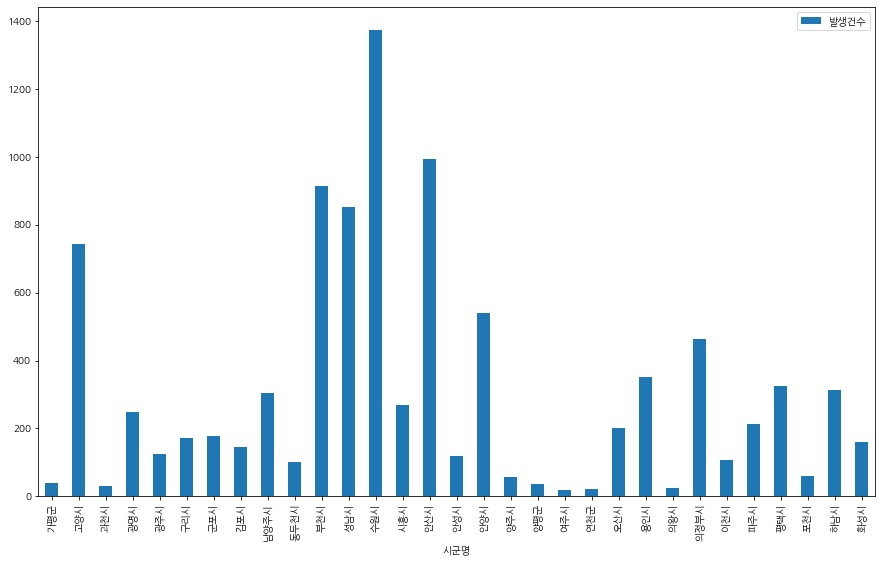

In [42]:
(
df
.groupby('시군명')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(15,9))

<AxesSubplot:xlabel='사고년도'>

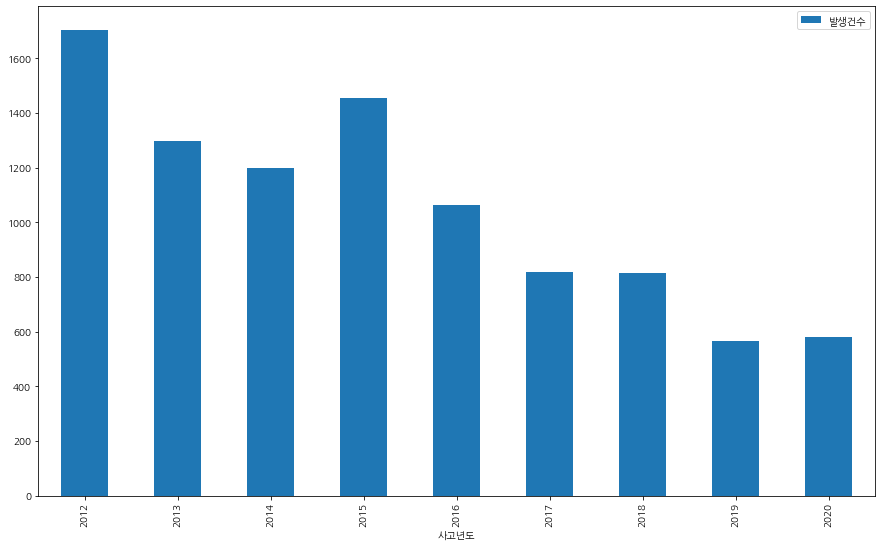

In [43]:
(
df
.groupby('사고년도')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(15,9))

### 년도별 누적 수

<AxesSubplot:xlabel='사고년도'>

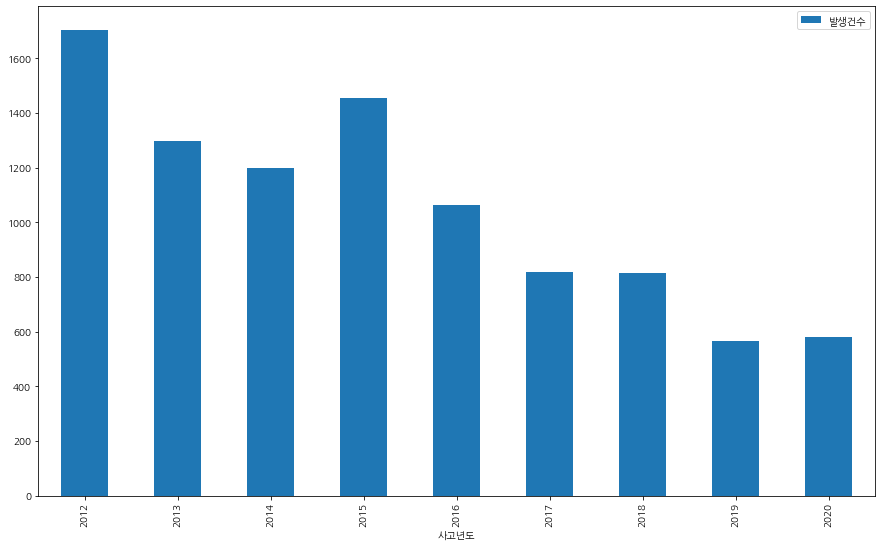

In [44]:
(
df
.groupby('사고년도')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(15,9))

In [142]:
pv=df.pivot_table(index='시군명',columns='사고년도',values='발생건수',
              aggfunc='sum',fill_value=0)

In [144]:
pv

사고년도,2012,2013,2014,2015,2016,2017,2018,2019,2020
시군명,,,,,,,,,
가평군,9,8,0,3,4,10,4,0,0
고양시,152,105,100,90,70,63,72,59,34
과천시,8,10,6,3,0,0,0,0,5
광명시,41,30,34,43,28,20,24,11,18
광주시,12,20,5,14,25,10,23,3,14
구리시,58,19,33,15,7,7,6,19,8
군포시,27,34,34,15,22,7,15,10,13
김포시,29,5,15,12,19,15,19,16,14
남양주시,50,32,33,31,20,33,47,19,39


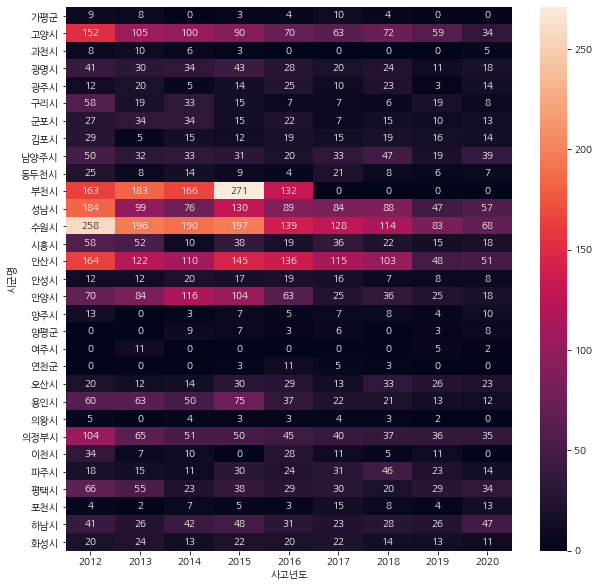

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(pv,annot=True,fmt='d')
plt.show()

 ###  최대(nlargest) 이용

### 발생건수를 기준으로 정렬하였다. 

In [45]:
df.nlargest(100,'발생건수').head(3) #20112년, 수원시에서 무단횡단사고 26건의 사고 발생
                                    #2013년, 수원시에서 무단횡단사고 23건의 사고 발생
                                    #2015년, 수원시에서 무단횡단사고 20건의 사고 발생

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
1073,수원시,2012,무단횡단사고다발지,411339009,경기 수원서부9,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26,26,0,22,4,0,37.265498,127.001433
1018,수원시,2013,무단횡단사고다발지,411339001,경기 수원서부1,경기도 수원시 팔달구 교동(수원역남단교차로 부근),23,23,0,18,5,0,37.266356,127.001493
939,수원시,2015,무단횡단사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 매산로1가(수원역동측단일로 부근),20,20,2,12,6,0,37.266833,127.001830


### 사상자수를 기준으로 정렬

In [46]:
df.nlargest(100,'사상자수').head(3) #20112년, 수원시에서 무단횡단사고 26건의 사고 발생
                                    #2013년, 수원시에서 무단횡단사고 23건의 사고 발생
                                    

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
1073,수원시,2012,무단횡단사고다발지,411339009,경기 수원서부9,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26,26,0,22,4,0,37.265498,127.001433
1018,수원시,2013,무단횡단사고다발지,411339001,경기 수원서부1,경기도 수원시 팔달구 교동(수원역남단교차로 부근),23,23,0,18,5,0,37.266356,127.001493
939,수원시,2015,무단횡단사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 매산로1가(수원역동측단일로 부근),20,20,2,12,6,0,37.266833,127.001830


### 사망자수를 기준으로 정렬

In [47]:
df.nlargest(100,'사망자수').head(3)  #2017년 시흥시 무단횡단사고다발지에서 2명의 사망자 발생
                                     #2017년 용인시 보행노인사고다발지에서 2명의 사망자 발생
                                     #2016  보행노인사고다발지에서 2명의 사망자 발생

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
1130,시흥시,2013,무단횡단사고다발지,411335001,경기 시흥1,경기도 시흥시 신천동(신천사거리 부근),10,11,4,4,2,1,37.440570,126.784740
1632,용인시,2014,무단횡단사고다발지,131741001,경기 용인동부1,경기도 용인시 처인구 김량장동(골드뱅크보광당 부근),17,17,4,9,4,0,37.234204,127.208747
1060,수원시,2012,무단횡단사고다발지,411339007,경기 수원서부7,경기도 수원시 권선구 고색동(고색주유소 부근),6,8,3,3,2,0,37.251552,126.983538


In [48]:
df['사망자수'].value_counts() 

0    1640
1     340
2      54
4       2
3       2
Name: 사망자수, dtype: int64

In [49]:
#사망자수가 가장 많은 유형 확인 해보면 좋을듯...!

### 경상자수 확인

In [50]:
df.nlargest(100,'경상자수').head(3)  #2013년 성남시 무단횡단사고다발지에서 10명의 경상자 발생
                                     #2012년 성남시 무단횡단사고다발지에서 10명의 경상자 발생
                                     #2016년 수원시 보행노인사고다발시에서 8명의 경상자 발생

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
756,성남시,2013,무단횡단사고다발지,411308001,경기 성남수정1,경기도 성남시 수정구 수진동(모란사거리 부근),10,14,2,2,10,0,37.433471,127.129263
792,성남시,2012,무단횡단사고다발지,411332003,경기 성남중원3,경기도 성남시 중원구 성남동(모란시장사거리 부근),9,13,1,2,10,0,37.431294,127.129275
911,수원시,2016,보행노인사고다발지,41111001,경기도 수원시 장안구1,경기도 수원시 장안구 영화동(수성중사거리 부근),7,12,0,4,8,0,37.292253,127.012050


### 부상자수 확인

In [51]:
df.nlargest(100,'부상자수').head(3)  #2015년 광명시 자전거사고다발지에서 4명의 부상자 발생
                                     #2015년 부천시 자전거사고다발지에서 4명의 부상자 발생
                                     #2017년 가평군 무단횡단사고다발지에서 3명의 부상자 발생

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
205,광명시,2015,자전거사고다발지,41210002,경기도 광명시2,경기도 광명시 광명동(광명사거리 부근),7,7,0,0,3,4,37.479562,126.853750
533,부천시,2015,자전거사고다발지,41195003,경기도 부천시 원미구3,경기도 부천시 원미구 상동(중동대로사거리 부근),9,10,0,1,5,4,37.505634,126.757403
1938,하남시,2020,자전거사고다발지,41450004,경기도 하남시4,경기도 하남시 미사동(부라더미싱 부근),5,7,0,1,2,4,37.567759,127.211979


### 중상자수 확인

In [52]:
df.nlargest(100,'중상자수').head(3)  #2012년 성남시 무단횡단사고다발지에서12명의 부상자 발생
                                     #2015년 수원시 무단횡단사고다발지에서 12명의 부상자 발생
                                     #2012년 고양시 무단횡단사고다발지에서 10의 부상자 발생

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
1073,수원시,2012,무단횡단사고다발지,411339009,경기 수원서부9,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26,26,0,22,4,0,37.265498,127.001433
1018,수원시,2013,무단횡단사고다발지,411339001,경기 수원서부1,경기도 수원시 팔달구 교동(수원역남단교차로 부근),23,23,0,18,5,0,37.266356,127.001493
1642,용인시,2013,무단횡단사고다발지,411317001,경기 용인동부1,경기도 용인시 처인구 김량장동(용인사거리 부근),18,19,2,14,3,0,37.234829,127.208877


In [146]:
df.groupby('사고유형구분')[['사상자수','사망자수','중상자수','경상자수','부상자수']].sum()

,사상자수,사망자수,중상자수,경상자수,부상자수
사고유형구분,,,,,
무단횡단사고다발지,2551,147,1440,886,78
보행노인사고다발지,3256,242,1854,1016,144
보행어린이사고다발지,683,10,232,391,50
스쿨존내어린이사고다발지,114,10,45,57,2
자전거사고다발지,3402,53,1182,1747,420


<AxesSubplot:xlabel='사고유형구분'>

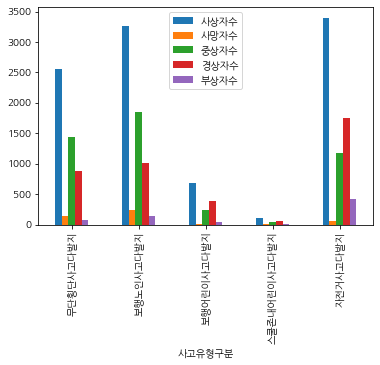

In [148]:
df.groupby('사고유형구분')[['사상자수','사망자수','중상자수','경상자수','부상자수']].sum().plot(kind='bar')

## 대체로 무단횡단,자전거사고다발지,보행노인사고다발지에서 많은 사람들이 다치는것으로 확인

### sort_values이용

In [53]:
(
    df[['사고년도','사고유형구분','시도시군구명','발생건수']]
.sort_values('사고유형구분',ascending=False)
)

,사고년도,사고유형구분,시도시군구명,발생건수
601,2013,자전거사고다발지,경기도 부천시 원미구11,5
1387,2014,자전거사고다발지,경기도 안성시1,5
921,2016,자전거사고다발지,경기도 수원시 장안구6,4
920,2016,자전거사고다발지,경기도 수원시 팔달구1,6
919,2016,자전거사고다발지,경기도 수원시 팔달구2,5
...,...,...,...,...
660,2018,무단횡단사고다발지,경기 성남수정1,4
661,2018,무단횡단사고다발지,경기 분당1,4
1563,2016,무단횡단사고다발지,경기 화성동부2,6
1562,2016,무단횡단사고다발지,경기 화성동부3,5


In [54]:
#사고유형을 기준으로 정렬해보기
(
    df[['사고년도','사고유형구분','시도시군구명','발생건수']]
.sort_values('사고유형구분',ascending=True)
)

,사고년도,사고유형구분,시도시군구명,발생건수
1018,2013,무단횡단사고다발지,경기 수원서부1,23
336,2012,무단횡단사고다발지,경기 군포2,5
1631,2014,무단횡단사고다발지,경기 용인동부2,6
1632,2014,무단횡단사고다발지,경기 용인동부1,17
1633,2014,무단횡단사고다발지,경기 용인동부3,5
...,...,...,...,...
392,2019,자전거사고다발지,경기도 남양주시1,4
629,2012,자전거사고다발지,경기도 부천시 원미구9,8
1565,2016,자전거사고다발지,경기도 오산시2,6
1555,2018,자전거사고다발지,경기도 오산시4,4


### value_count 이용
#### 한건의 사고에서 다치거나 사망하는 인원수 확인

In [55]:
df['부상자수'].value_counts().sort_index()#한건의 사고에서 부상자수가 가장 많이 발생하는경우는 4명 

0    1504
1     409
2      94
3      27
4       4
Name: 부상자수, dtype: int64

In [56]:
df['사망자수'].value_counts().sort_index()

0    1640
1     340
2      54
3       2
4       2
Name: 사망자수, dtype: int64

In [57]:
df['경상자수'].value_counts().sort_index() #10명 

0     334
1     530
2     505
3     337
4     187
5      95
6      36
7       9
8       3
10      2
Name: 경상자수, dtype: int64

In [58]:
df['중상자수'].value_counts().sort_index() #12명

0     200
1     492
2     517
3     451
4     214
5      81
6      40
7      21
8      10
9       3
10      3
11      1
12      2
14      1
18      1
22      1
Name: 중상자수, dtype: int64

In [59]:
df['사상자수'].value_counts().sort_index() #사상자:사망자+부상자+경상자+중상자를 다 합친 값 
                                           #한건의 사고에서 가장 많은 사상자는 26명이다.  

1       7
2      69
3     424
4     574
5     414
6     193
7     151
8      85
9      47
10     21
11     23
12      5
13     10
14      6
15      2
16      1
17      2
19      1
20      1
23      1
26      1
Name: 사상자수, dtype: int64

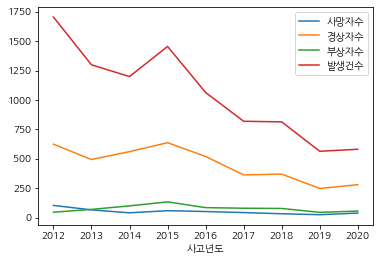

In [60]:
df.groupby('사고년도')['사망자수'].sum().plot(label='사망자수')
df.groupby('사고년도')['경상자수'].sum().plot(label='경상자수')
df.groupby('사고년도')['부상자수'].sum().plot(label='부상자수')
df.groupby('사고년도')['발생건수'].sum().plot(label='발생건수')
plt.legend()
plt.show()

###   groupby 이용

### 경기도 내에 발생건수 확인

### 사고년도별 발생건수 확인

In [61]:
(
df
.groupby('시도시군구명')
.agg({'발생건수':'sum'})
)

,발생건수
시도시군구명,
경기 가평1,8
경기 가평2,3
경기 고양1,40
경기 고양2,15
경기 고양3,10
...,...
경기도 화성시1,69
경기도 화성시2,33
경기도 화성시3,15


In [62]:
df['사고지역위치명'].value_counts().head(5) #가장 많이 발생한 위치명

경기도 광명시 광명동(광명사거리 부근)         8
경기도 하남시 신장동(신장사거리 부근)         7
경기도 안양시 만안구 박달동(박달사거리 부근)     6
경기도 안양시 만안구 안양동(벽산사거리 부근)     6
경기도 수원시 장안구 영화동(장안문로터리 부근)    6
Name: 사고지역위치명, dtype: int64

## 위도 경도 지도 시각화

<AxesSubplot:xlabel='경도', ylabel='위도'>

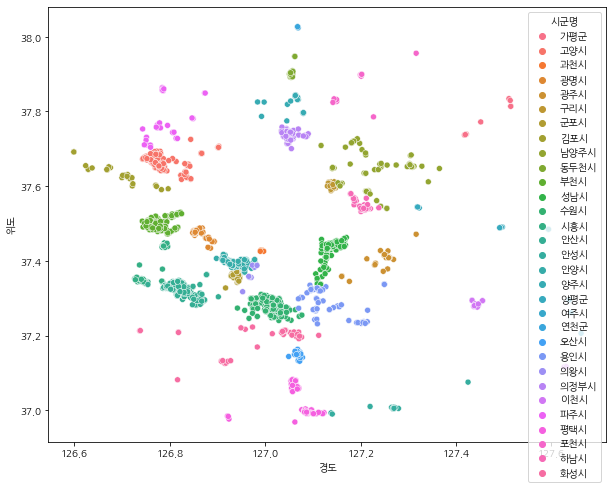

In [64]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='경도',y='위도', hue='시군명')

# #위도의 평균과 경도의 평균을 구하고, 지도의 중심을 잡아준다.
map= folium.Map(location=[df['위도'].mean(),df['경도'].mean()],
           zoom_start=10)

for  n in df.index:
    name=df.loc[n,'시군명']
    address=df.loc[n,'사고유형구분']
    popup = f"{name}-{address}"
    location= [df.loc[n,'위도'],df.loc[n,'경도']]
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map)
map

In [65]:
map= folium.Map(location=[df['위도'].mean(),df['경도'].mean()],
           zoom_start=10)

for  n in df.index:
    name=df.loc[n,'시도시군구명']
    address=df.loc[n,'위치코드']
    popup = f"{name}-{address}"
    location= [df.loc[n,'위도'],df.loc[n,'경도']]
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map)
map# # #위도의 평균과 경도의 평균을 구하고, 지도의 중심을 잡아준다.

### 사고가 가장 많이 발생한 지역 확인

In [66]:
suwon=df[df['시군명']=='수원시']
suwon.head()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
809,수원시,2020,보행노인사고다발지,41117001,경기도 수원시 영통구1,경기도 수원시 영통구 영통동(느티나무사거리 부근),2,2,2,0,0,0,37.255681,127.075371
810,수원시,2020,보행노인사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 지동(영동사거리 부근),5,5,0,2,3,0,37.275303,127.018457
811,수원시,2020,보행노인사고다발지,41115002,경기도 수원시 팔달구2,경기도 수원시 팔달구 화서동(화서오거리 부근),5,6,0,1,5,0,37.278786,127.001132
812,수원시,2020,보행노인사고다발지,41115003,경기도 수원시 팔달구3,경기도 수원시 팔달구 우만동(수원명가 부근),3,3,1,2,0,0,37.286575,127.033141
813,수원시,2020,보행노인사고다발지,41111001,경기도 수원시 장안구1,경기도 수원시 장안구 연무동(퉁소바위사거리 부근),4,4,0,3,1,0,37.292156,127.028757


In [67]:
suwon.loc[suwon['사고유형구분'] == '자전?', '사고유형구분'] = '자전거사고다발지'
suwon.head()

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
809,수원시,2020,보행노인사고다발지,41117001,경기도 수원시 영통구1,경기도 수원시 영통구 영통동(느티나무사거리 부근),2,2,2,0,0,0,37.255681,127.075371
810,수원시,2020,보행노인사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 지동(영동사거리 부근),5,5,0,2,3,0,37.275303,127.018457
811,수원시,2020,보행노인사고다발지,41115002,경기도 수원시 팔달구2,경기도 수원시 팔달구 화서동(화서오거리 부근),5,6,0,1,5,0,37.278786,127.001132
812,수원시,2020,보행노인사고다발지,41115003,경기도 수원시 팔달구3,경기도 수원시 팔달구 우만동(수원명가 부근),3,3,1,2,0,0,37.286575,127.033141
813,수원시,2020,보행노인사고다발지,41111001,경기도 수원시 장안구1,경기도 수원시 장안구 연무동(퉁소바위사거리 부근),4,4,0,3,1,0,37.292156,127.028757


In [68]:
suwon.loc[suwon['사고유형구분'] == '보행노', '사고유형구분'] = '보행노인사고다발지'
suwon.head()

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
809,수원시,2020,보행노인사고다발지,41117001,경기도 수원시 영통구1,경기도 수원시 영통구 영통동(느티나무사거리 부근),2,2,2,0,0,0,37.255681,127.075371
810,수원시,2020,보행노인사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 지동(영동사거리 부근),5,5,0,2,3,0,37.275303,127.018457
811,수원시,2020,보행노인사고다발지,41115002,경기도 수원시 팔달구2,경기도 수원시 팔달구 화서동(화서오거리 부근),5,6,0,1,5,0,37.278786,127.001132
812,수원시,2020,보행노인사고다발지,41115003,경기도 수원시 팔달구3,경기도 수원시 팔달구 우만동(수원명가 부근),3,3,1,2,0,0,37.286575,127.033141
813,수원시,2020,보행노인사고다발지,41111001,경기도 수원시 장안구1,경기도 수원시 장안구 연무동(퉁소바위사거리 부근),4,4,0,3,1,0,37.292156,127.028757


## 수원시 년도별 발생건수 확인

<AxesSubplot:xlabel='사고년도'>

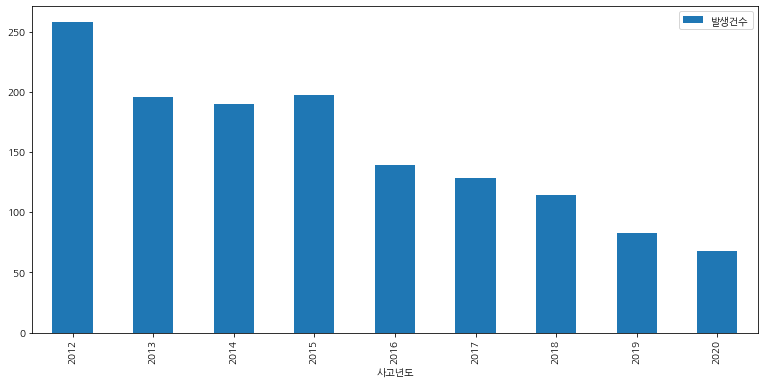

In [69]:
(
suwon
.groupby('사고년도')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(13,6))

<AxesSubplot:xlabel='사고유형구분'>

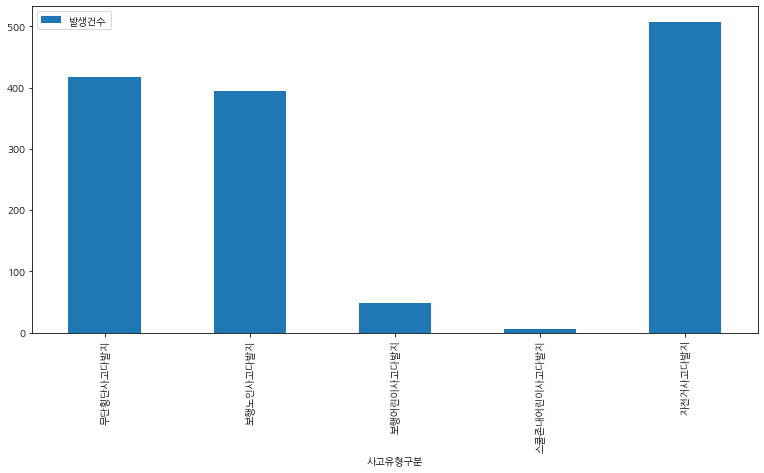

In [70]:
(
suwon
.groupby('사고유형구분')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(13,6))

In [71]:
suwon.groupby('사고년도')['사고유형구분'].value_counts().sort_values(ascending=False)

사고년도  사고유형구분      
2012  무단횡단사고다발지       35
2014  자전거사고다발지        17
      보행노인사고다발지       16
2013  무단횡단사고다발지       15
2015  자전거사고다발지        15
2016  자전거사고다발지        14
2018  보행노인사고다발지       13
2016  보행노인사고다발지       13
2019  자전거사고다발지        12
2017  자전거사고다발지        12
2020  보행노인사고다발지       11
2018  자전거사고다발지        11
2012  보행노인사고다발지       10
2013  보행노인사고다발지       10
      자전거사고다발지         9
2015  무단횡단사고다발지        9
      보행노인사고다발지        9
2017  보행노인사고다발지        9
2019  보행노인사고다발지        7
2020  자전거사고다발지         7
2017  무단횡단사고다발지        6
2015  보행어린이사고다발지       4
2014  보행어린이사고다발지       4
2012  자전거사고다발지         4
2016  무단횡단사고다발지        2
      보행어린이사고다발지       2
2018  보행어린이사고다발지       2
2014  스쿨존내어린이사고다발지     1
2016  스쿨존내어린이사고다발지     1
2013  보행어린이사고다발지       1
2012  스쿨존내어린이사고다발지     1
      보행어린이사고다발지       1
Name: 사고유형구분, dtype: int64

In [72]:
suwon.groupby('사고지역위치명')['발생건수'].count().sort_values(ascending=False)

사고지역위치명
경기도 수원시 장안구 영화동(장안문로터리 부근)      6
경기도 수원시 장안구 영화동(정자사거리 부근)       5
경기도 수원시 영통구 매탄동(법원사거리 부근)       5
경기도 수원시 팔달구 인계동(시청사거리 부근)       4
경기도 수원시 팔달구 화서동(화서오거리 부근)       4
                               ..
경기도 수원시 장안구 정자동(효천초교사거리 부근)     1
경기도 수원시 장안구 정자동(효자문사거리 부근)      1
경기도 수원시 장안구 정자동(체육회관B 부근)       1
경기도 수원시 장안구 정자동(진미콩비지해장국 부근)    1
경기도 수원시 장안구 정자동(두견사거리 부근)       1
Name: 발생건수, Length: 229, dtype: int64

In [73]:
suwon.groupby('사고지역위치명')['사고유형구분'].value_counts()

사고지역위치명                     사고유형구분      
경기도 수원시 권선구 고색동(고색주유소 부근)   무단횡단사고다발지       1
                            자전거사고다발지        1
경기도 수원시 권선구 고색동(호매실초교 부근)   스쿨존내어린이사고다발지    1
경기도 수원시 권선구 곡반정동(사무실 부근)    자전거사고다발지        1
경기도 수원시 권선구 구운동(구운사거리 부근)   무단횡단사고다발지       1
                                           ..
경기도 수원시 팔달구 화서동(수원문구 부근)    무단횡단사고다발지       1
경기도 수원시 팔달구 화서동(화서문로터리 부근)  자전거사고다발지        1
경기도 수원시 팔달구 화서동(화서사거리 부근)   무단횡단사고다발지       1
경기도 수원시 팔달구 화서동(화서오거리 부근)   보행노인사고다발지       3
                            보행어린이사고다발지      1
Name: 사고유형구분, Length: 260, dtype: int64

In [74]:
suwon.head(3)

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
809,수원시,2020,보행노인사고다발지,41117001,경기도 수원시 영통구1,경기도 수원시 영통구 영통동(느티나무사거리 부근),2,2,2,0,0,0,37.255681,127.075371
810,수원시,2020,보행노인사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 지동(영동사거리 부근),5,5,0,2,3,0,37.275303,127.018457
811,수원시,2020,보행노인사고다발지,41115002,경기도 수원시 팔달구2,경기도 수원시 팔달구 화서동(화서오거리 부근),5,6,0,1,5,0,37.278786,127.001132


In [75]:
#사고유형을 기준으로 정렬해보기
(
    suwon[['사고년도','사고유형구분','사고지역위치명','발생건수']]
.sort_values('발생건수',ascending=False)
)

,사고년도,사고유형구분,사고지역위치명,발생건수
1073,2012,무단횡단사고다발지,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26
1018,2013,무단횡단사고다발지,경기도 수원시 팔달구 교동(수원역남단교차로 부근),23
939,2015,무단횡단사고다발지,경기도 수원시 팔달구 매산로1가(수원역동측단일로 부근),20
1072,2012,무단횡단사고다발지,경기도 수원시 팔달구 매산로1가(고등동터미널입구A 부근),13
1053,2012,무단횡단사고다발지,경기도 수원시 장안구 정자동(수성중사거리 부근),13
...,...,...,...,...
857,2018,보행노인사고다발지,경기도 수원시 장안구 송죽동(만석거삼거리 부근),2
819,2020,보행노인사고다발지,경기도 수원시 권선구 세류동(동립말사거리 부근),2
1087,2012,스쿨존내어린이사고다발지,경기도 수원시 영통구 매탄동(매탄초교 효동초교 부근),2
988,2014,스쿨존내어린이사고다발지,경기도 수원시 권선구 고색동(호매실초교 부근),2


In [76]:
#사고유형을 기준으로 정렬해보기
(
    suwon[['사고년도','사고유형구분','사고지역위치명','사상자수']]
.sort_values('사상자수',ascending=False)
) #2015년 첫번째 무단횡단사고다발지에서 사상자 수가 20명이 나왔다


,사고년도,사고유형구분,사고지역위치명,사상자수
1073,2012,무단횡단사고다발지,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26
1018,2013,무단횡단사고다발지,경기도 수원시 팔달구 교동(수원역남단교차로 부근),23
939,2015,무단횡단사고다발지,경기도 수원시 팔달구 매산로1가(수원역동측단일로 부근),20
1053,2012,무단횡단사고다발지,경기도 수원시 장안구 정자동(수성중사거리 부근),14
1072,2012,무단횡단사고다발지,경기도 수원시 팔달구 매산로1가(고등동터미널입구A 부근),13
...,...,...,...,...
857,2018,보행노인사고다발지,경기도 수원시 장안구 송죽동(만석거삼거리 부근),2
1087,2012,스쿨존내어린이사고다발지,경기도 수원시 영통구 매탄동(매탄초교 효동초교 부근),2
819,2020,보행노인사고다발지,경기도 수원시 권선구 세류동(동립말사거리 부근),2
988,2014,스쿨존내어린이사고다발지,경기도 수원시 권선구 고색동(호매실초교 부근),2


In [169]:
pv1=suwon.pivot_table(index='사고유형구분',columns='사고년도',values='발생건수',
              aggfunc='sum',fill_value=0)

In [170]:
pv1

사고년도,2012,2013,2014,2015,2016,2017,2018,2019,2020
사고유형구분,,,,,,,,,
무단횡단사고다발지,196,113,0,66,9,33,0,0,0
보행노인사고다발지,37,39,76,32,57,39,52,24,38
보행어린이사고다발지,3,3,16,13,7,0,7,0,0
스쿨존내어린이사고다발지,2,0,2,0,2,0,0,0,0
자전거사고다발지,20,41,96,86,64,56,55,59,30


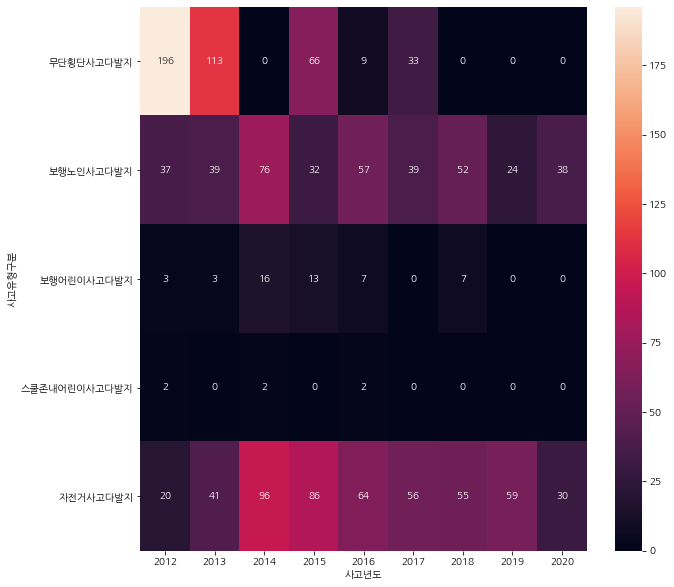

In [171]:
plt.figure(figsize=(10,10))
sns.heatmap(pv1,annot=True,fmt='d')
plt.show()

<AxesSubplot:xlabel='사고유형구분'>

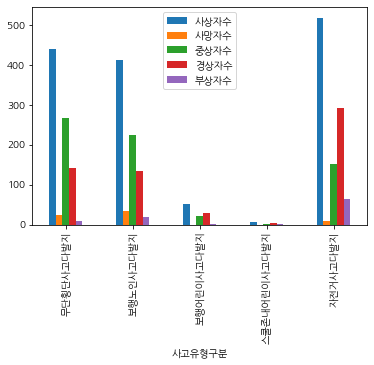

In [159]:
suwon.groupby('사고유형구분')[['사상자수','사망자수','중상자수','경상자수','부상자수']].sum().plot(kind='bar')

<AxesSubplot:xlabel='경도', ylabel='위도'>

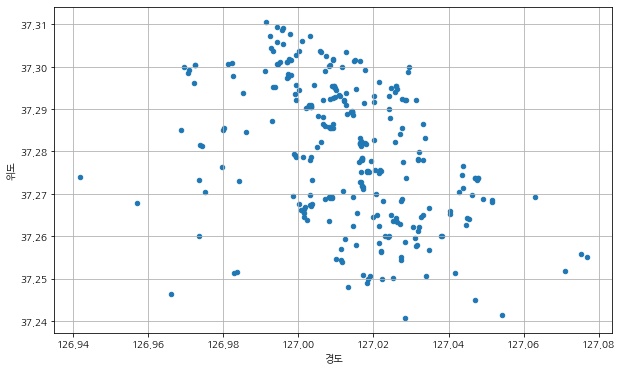

In [77]:
suwon[['경도','위도','시군명']].plot.scatter(x='경도',y='위도',figsize=(10,6), grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

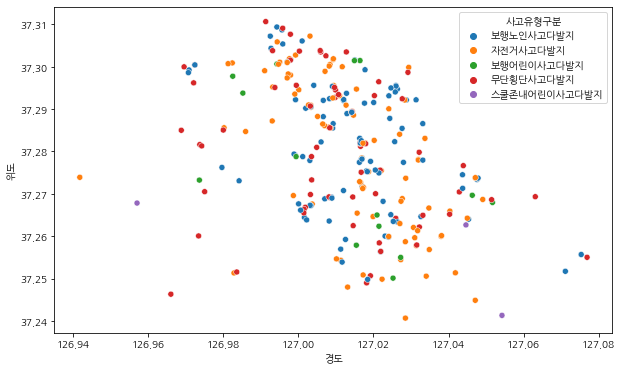

In [78]:
#suwon데이터
plt.figure(figsize=(10,6))
sns.scatterplot(data=suwon, x='경도',y='위도', hue='사고유형구분')

In [79]:
# 자전거 사고다발지가 수원 남부지역에 많이 발생된 것을 볼 수 있다. 따라서 수원 지도데이터를 분석한 결과 아파트 주변과,
#사거리 주변에 많이 발생한 것을 알 수 있다.
# 보행노인은 시장, 공원 

In [80]:
#suwon데이터
map= folium.Map(location=[suwon['위도'].mean(),suwon['경도'].mean()],
           zoom_start=10)

for  n in suwon.index:
    name=suwon.loc[n,'시도시군구명']
    address=suwon.loc[n,'사고유형구분']
    popup = f"{name}-{address}"
    location= [suwon.loc[n,'위도'],suwon.loc[n,'경도']]
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map)
map# # #위도의 평균과 경도의 평균을 구하고, 지도의 중심을 잡아준다.

map= folium.Map(location=[suwon['위도'].mean(),suwon['경도'].mean()],
           zoom_start=10)

for  n in suwon.index:
    name=df.loc[n,'시도시군구명']
    address=suwon.loc[n,'위치코드']
    popup = f"{name}-{address}"
    location= [suwon.loc[n,'위도'],df.loc[n,'경도']]
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map)
map# # #위도의 평균과 경도의 평균을 구하고, 지도의 중심을 잡아준다.

In [81]:
df.loc[df['사고유형구분'] == '자전?', '사고유형구분'] = '자전거사고다발지'
df.head()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0,가평군,2018,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.421720
1,가평군,2017,무단횡단사고다발지,281141002,경기 가평2,경기도 가평군 가평읍(가평군농협 자라섬지점 부근),3,3,2,1,0,0,37.814267,127.514815
2,가평군,2017,무단횡단사고다발지,281141001,경기 가평1,경기도 가평군 청평면(종로약국 부근),4,4,0,0,1,3,37.737294,127.418783
3,가평군,2017,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 가평읍(가평군농협하나로마트자라점 부근),3,3,2,1,0,0,37.813743,127.514905
4,가평군,2016,자전거사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(중감천교 부근),4,4,0,2,2,0,37.771986,127.451958


In [82]:
df.loc[df['사고유형구분'] == '보행노', '사고유형구분'] = '보행노인사고다발지'
df.head()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0,가평군,2018,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.421720
1,가평군,2017,무단횡단사고다발지,281141002,경기 가평2,경기도 가평군 가평읍(가평군농협 자라섬지점 부근),3,3,2,1,0,0,37.814267,127.514815
2,가평군,2017,무단횡단사고다발지,281141001,경기 가평1,경기도 가평군 청평면(종로약국 부근),4,4,0,0,1,3,37.737294,127.418783
3,가평군,2017,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 가평읍(가평군농협하나로마트자라점 부근),3,3,2,1,0,0,37.813743,127.514905
4,가평군,2016,자전거사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(중감천교 부근),4,4,0,2,2,0,37.771986,127.451958


<AxesSubplot:xlabel='사고유형구분'>

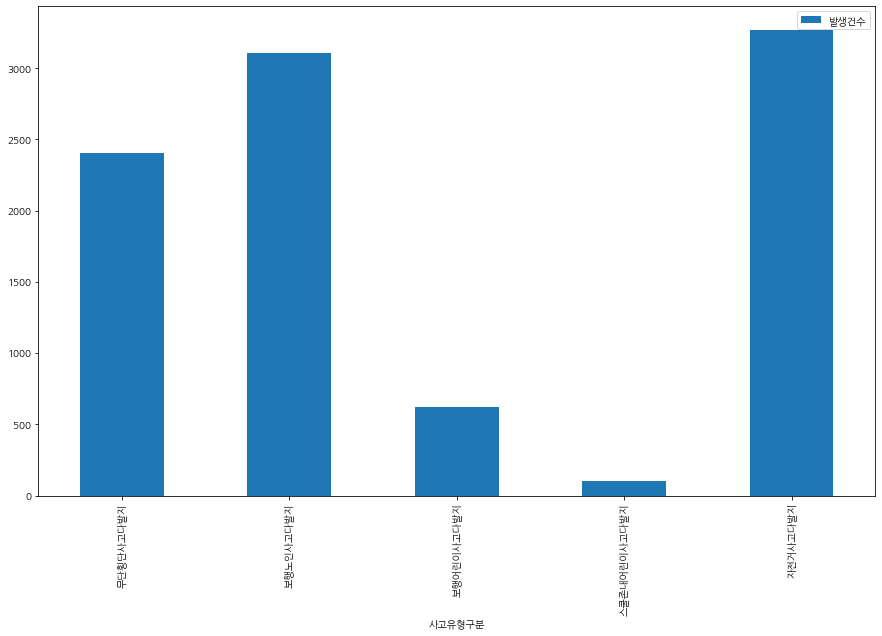

In [83]:
(
df
.groupby('사고유형구분')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(15,9))

## 전제 데이터 중 상위사고유형 2곳을 더 분석한다.

## 자전거사고다발지

In [84]:
bike=df[df['사고유형구분']=='자전거사고다발지']
bike.head()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
4,가평군,2016,자전거사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(중감천교 부근),4,4,0,2,2,0,37.771986,127.451958
17,고양시,2020,자전거사고다발지,41285002,경기도 고양시 일산동구2,경기도 고양시 일산동구 정발산동(저동고교사거리 부근),4,4,0,1,2,1,37.671040,126.780628
18,고양시,2020,자전거사고다발지,41285001,경기도 고양시 일산동구1,경기도 고양시 일산동구 장항동(필라테스콜링 부근),4,4,0,1,2,1,37.649387,126.769279
19,고양시,2020,자전거사고다발지,41281001,경기도 고양시 덕양구1,경기도 고양시 덕양구 토당동(토당육교교차로 부근),4,4,0,3,1,0,37.630004,126.822881
28,고양시,2019,자전거사고다발지,41285002,경기도 고양시 일산동구2,경기도 고양시 일산동구 장항동(호수로640 부근),4,4,0,3,1,0,37.659821,126.765833


In [85]:
bike.loc[bike['사고유형구분'] == '자전?', '사고유형구분'] = '자전거사고다발지'

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [86]:
bike.shape

(632, 14)

<AxesSubplot:xlabel='사고년도'>

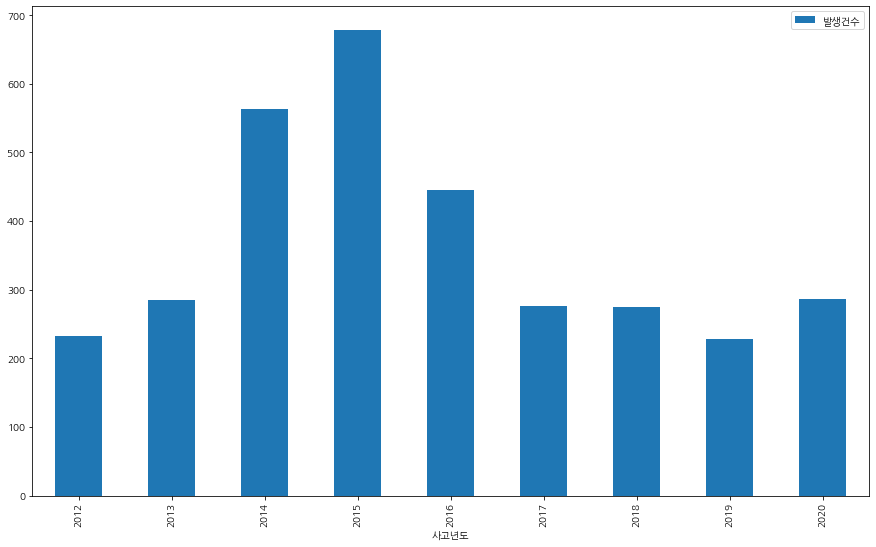

In [87]:
(
 bike
.groupby('사고년도')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(15,9))

In [88]:
(
bike
.groupby('시군명')
.agg({'발생건수':'sum'})
)  #시군명으로 보았을때 안산시가 가장 많은것을 알수있다.

,발생건수
시군명,
가평군,4
고양시,341
과천시,7
광명시,108
광주시,4
구리시,49
군포시,39
김포시,35
남양주시,42


In [89]:
#사고유형을 기준으로 정렬해보기
(
    bike[['사고년도','시군명','발생건수']]
.sort_values('발생건수',ascending=False)
)

,사고년도,시군명,발생건수
732,2015,성남시,13
531,2015,부천시,13
607,2013,부천시,11
569,2014,부천시,11
570,2014,부천시,10
...,...,...,...
648,2020,성남시,3
1161,2020,안산시,3
167,2020,과천시,3
1411,2018,안양시,3


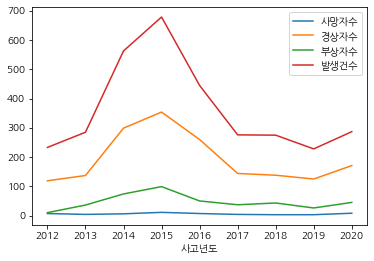

In [93]:
bike.groupby('사고년도')['사망자수'].sum().plot(label='사망자수')
bike.groupby('사고년도')['경상자수'].sum().plot(label='경상자수')
bike.groupby('사고년도')['부상자수'].sum().plot(label='부상자수')
bike.groupby('사고년도')['발생건수'].sum().plot(label='발생건수')
plt.legend()
plt.show()

In [166]:
pv3=bike.pivot_table(index='시군명',columns='사고년도',values='발생건수',
              aggfunc='sum',fill_value=0)

In [167]:
pv3

사고년도,2012,2013,2014,2015,2016,2017,2018,2019,2020
시군명,,,,,,,,,
가평군,0,0,0,0,4,0,0,0,0
고양시,40,44,68,56,31,42,24,24,12
과천시,0,4,0,0,0,0,0,0,3
광명시,5,9,15,24,18,9,9,5,14
광주시,0,0,0,0,0,0,0,0,4
구리시,9,4,16,5,4,5,0,6,0
군포시,8,0,5,0,9,4,4,0,9
김포시,0,0,13,0,4,0,4,10,4
남양주시,0,0,8,8,8,4,0,4,10


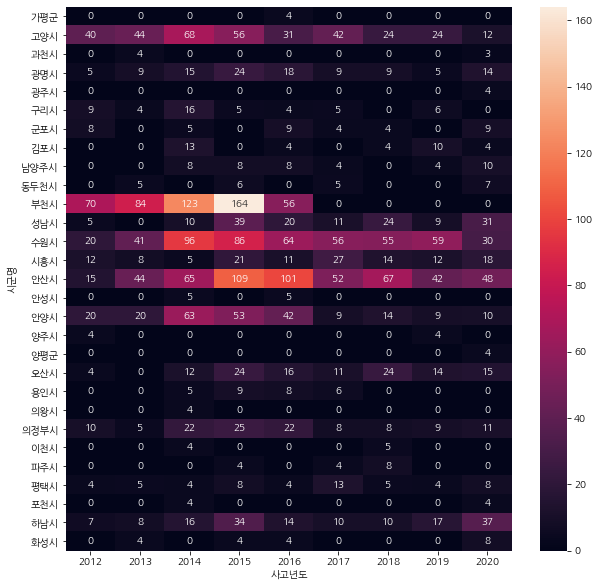

In [168]:
plt.figure(figsize=(10,10))
sns.heatmap(pv3,annot=True,fmt='d')
plt.show()

In [ ]:
#15년도가 가장 많다.

### 노인사고다발지역

In [94]:
old=df[df['사고유형구분']=='보행노인사고다발지']
old.head()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
0,가평군,2018,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면(청평터미널 부근),4,4,0,2,2,0,37.739333,127.421720
3,가평군,2017,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 가평읍(가평군농협하나로마트자라점 부근),3,3,2,1,0,0,37.813743,127.514905
5,가평군,2015,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 가평읍(한국전력공사 부근),3,3,0,1,2,0,37.834295,127.511137
6,가평군,2013,보행노인사고다발지,41820001,경기도 가평군1,경기도 가평군 청평면((은성장) 부근),5,5,0,5,0,0,37.737810,127.419731
7,가평군,2013,보행노인사고다발지,41820002,경기도 가평군2,경기도 가평군 가평읍((훼미리마트) 부근),3,3,0,2,1,0,37.829482,127.513841


In [131]:
old.shape

(776, 14)

<AxesSubplot:xlabel='사고년도'>

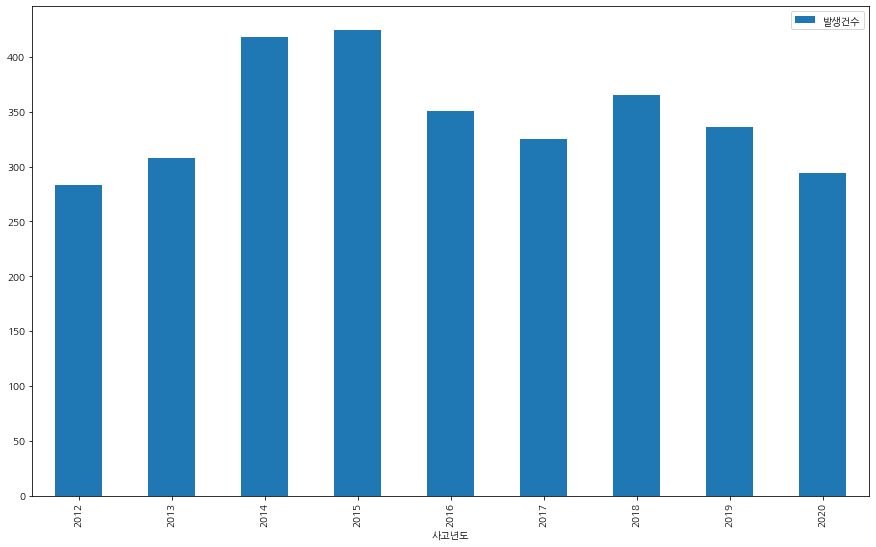

In [95]:
(
 old
.groupby('사고년도')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(15,9))

<AxesSubplot:xlabel='시군명'>

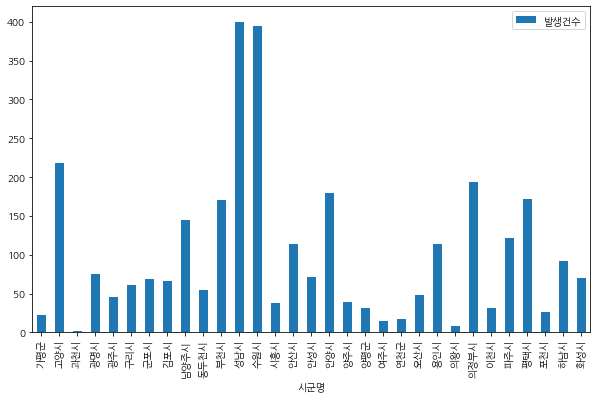

In [96]:
(
old
.groupby('시군명')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(10,6))

In [97]:
old['발생건수'].sum()

3105

In [98]:
old['사망자수'].sum()

242

In [99]:
old['중상자수'].sum()

1854

In [100]:
old['부상자수'].sum()

144

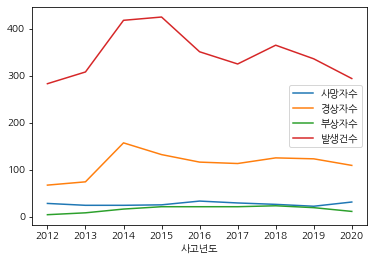

In [101]:
old.groupby('사고년도')['사망자수'].sum().plot(label='사망자수')
old.groupby('사고년도')['경상자수'].sum().plot(label='경상자수')
old.groupby('사고년도')['부상자수'].sum().plot(label='부상자수')
old.groupby('사고년도')['발생건수'].sum().plot(label='발생건수')
plt.legend()
plt.show()

<AxesSubplot:xlabel='시군명'>

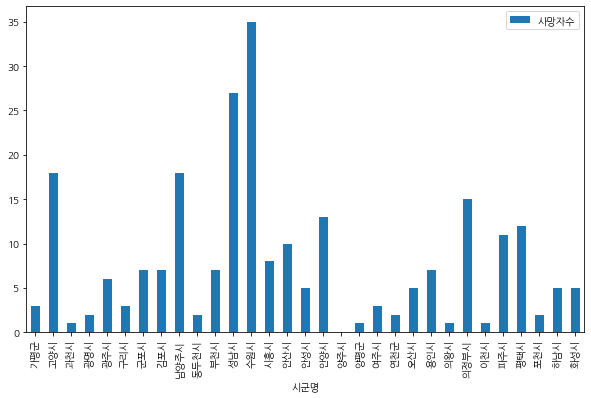

In [102]:
(
old
.groupby('시군명')
.agg({'사망자수':'sum'})
) .plot(kind='bar',figsize=(10,6))

In [103]:
#사고유형을 기준으로 정렬해보기
(
    old[['사고년도','시군명','발생건수']]
.sort_values('발생건수',ascending=False)
)

,사고년도,시군명,발생건수
682,2017,성남시,14
723,2015,성남시,11
683,2017,성남시,10
519,2015,부천시,10
1375,2017,안성시,10
...,...,...,...
391,2019,남양주시,2
679,2017,성남시,2
686,2017,성남시,2
687,2017,성남시,2


In [175]:
pv4=old.pivot_table(index='시군명',columns='사고년도',values='발생건수',
              aggfunc='sum',fill_value=0)

In [176]:
pv4

사고년도,2012,2013,2014,2015,2016,2017,2018,2019,2020
시군명,,,,,,,,,
가평군,5,8,0,3,0,3,4,0,0
고양시,26,13,22,22,29,12,37,35,22
과천시,0,0,0,0,0,0,0,0,2
광명시,14,9,14,9,4,3,12,6,4
광주시,3,6,5,5,9,0,4,3,10
구리시,5,5,17,10,3,0,0,13,8
군포시,0,7,17,7,10,3,11,10,4
김포시,0,0,2,9,9,15,15,6,10
남양주시,4,13,19,10,12,19,24,15,29


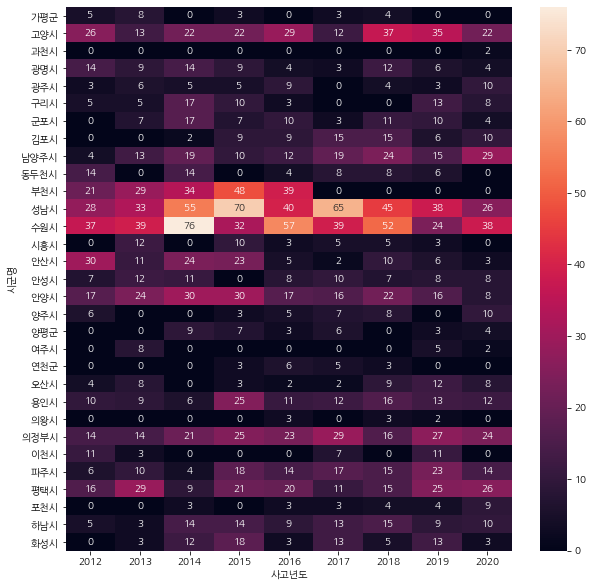

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(pv4,annot=True,fmt='d')
plt.show()

### 수원시 자전거사고다발지

In [104]:
bike1=suwon[suwon['사고유형구분']=='자전거사고다발지']
bike1.head()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
820,수원시,2020,자전거사고다발지,41115002,경기도 수원시 팔달구2,경기도 수원시 팔달구 화서동(꽃뫼사거리 부근),4,4,0,0,3,1,37.284712,126.985907
821,수원시,2020,자전거사고다발지,41111001,경기도 수원시 장안구1,경기도 수원시 장안구 영화동(조원동6405 부근),5,5,0,0,2,3,37.294725,127.015456
822,수원시,2020,자전거사고다발지,41111002,경기도 수원시 장안구2,경기도 수원시 장안구 영화동(정자사거리 부근),4,4,0,2,1,1,37.290846,127.003306
823,수원시,2020,자전거사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 남수동(팔달구청 부근),4,4,0,0,4,0,37.282624,127.020186
824,수원시,2020,자전거사고다발지,41113001,경기도 수원시 권선구1,경기도 수원시 권선구 권선동(맛고을사거리 부근),5,5,0,3,2,0,37.254453,127.027261


In [105]:
bike1.shape

(101, 14)

In [136]:
bike.shape

(632, 14)

In [137]:
632/101 # 전체 자전거사고다발지 중에서 수원이 6/1으로 많다.

6.257425742574258

<AxesSubplot:xlabel='사고년도'>

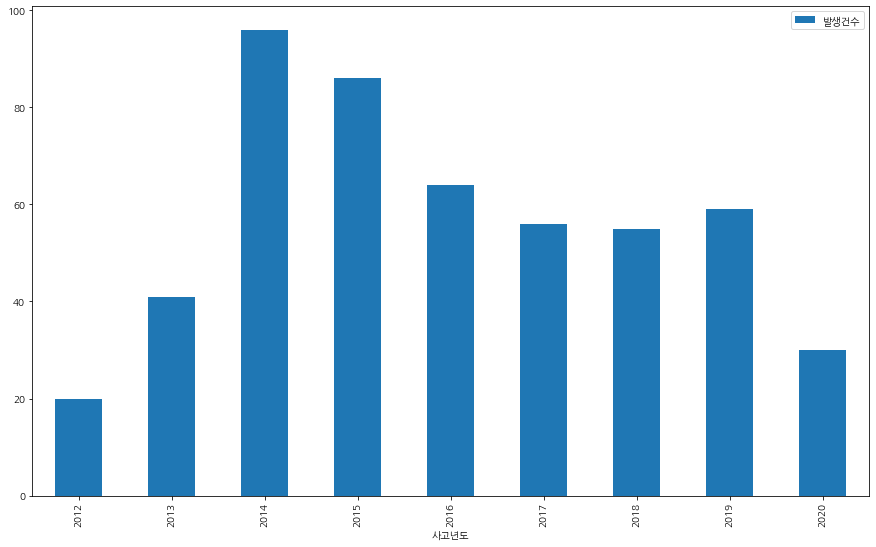

In [106]:
(
 bike1
.groupby('사고년도')
.agg({'발생건수':'sum'})
).plot(kind='bar',figsize=(15,9))

In [107]:
bike1['발생건수'].sum()

507

In [108]:
bike1['사망자수'].sum()

8

In [109]:
bike1['중상자수'].sum()

153

In [110]:
bike1['부상자수'].sum()

65

In [179]:
pv5=bike1.pivot_table(index='시도시군구명',columns='사고년도',values='발생건수',
              aggfunc='sum',fill_value=0)
pv5

사고년도,2012,2013,2014,2015,2016,2017,2018,2019,2020
시도시군구명,,,,,,,,,
경기도 수원시 권선구1,0,0,5,7,5,5,5,0,5
경기도 수원시 권선구2,0,0,5,5,5,4,5,0,4
경기도 수원시 권선구3,0,0,5,5,0,4,0,0,0
경기도 수원시 영통구1,0,4,7,7,4,5,0,0,0
경기도 수원시 영통구2,0,4,4,0,0,0,0,0,0
경기도 수원시 장안구1,5,6,8,6,5,5,6,7,5
경기도 수원시 장안구2,0,6,8,6,5,5,5,5,4
경기도 수원시 장안구3,0,5,6,6,5,5,4,5,4
경기도 수원시 장안구4,0,4,5,6,4,5,4,4,0


<AxesSubplot:xlabel='시도시군구명'>

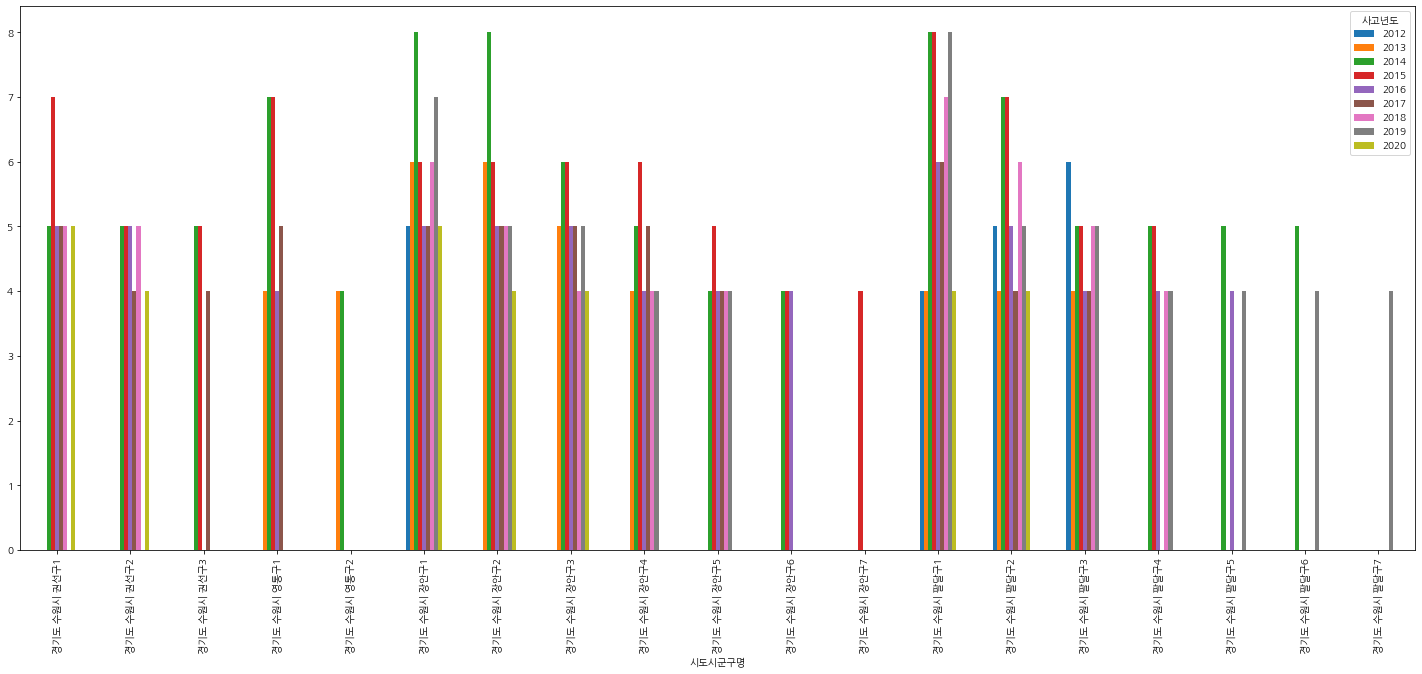

In [186]:
pv5.plot(kind='bar',figsize=(25,10))

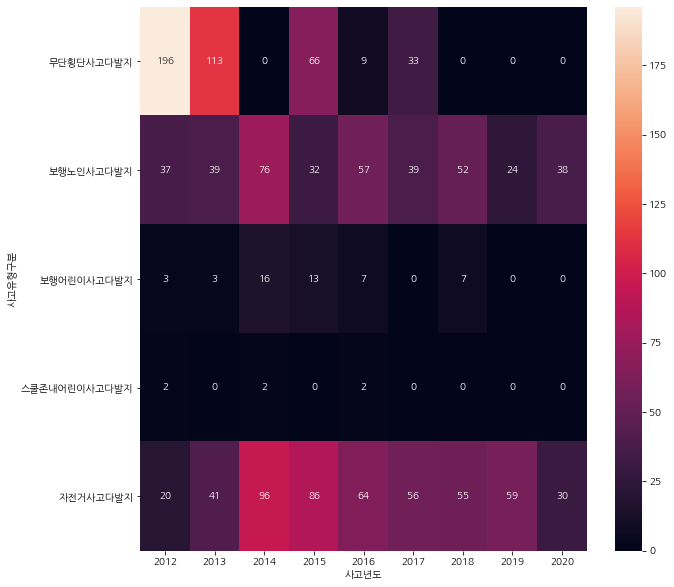

In [180]:

plt.figure(figsize=(10,10))
sns.heatmap(pv1,annot=True,fmt='d')
plt.show()

In [111]:
bike1.sort_values('발생건수',ascending=False).head()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
994,수원시,2014,자전거사고다발지,41111002,경기도 수원시 장안구2,경기도 수원시 장안구 영화동(정자사거리 부근),8,9,0,3,6,0,37.290986,127.002686
1000,수원시,2014,자전거사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 인계동(한신사거리 부근),8,8,0,3,4,1,37.273684,127.028595
965,수원시,2015,자전거사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 장안동(화서문로삼거리 부근),8,8,0,3,3,2,37.285548,127.008541
843,수원시,2019,자전거사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 지동(중부대로1432 부근),8,8,0,2,3,3,37.278122,127.031967
993,수원시,2014,자전거사고다발지,41111001,경기도 수원시 장안구1,경기도 수원시 장안구 영화동(장안문로터리 부근),8,8,1,1,6,0,37.289347,127.014103


In [112]:
#사고유형을 기준으로 정렬해보기
(
    bike1[['사고년도','발생건수']]
.sort_values('발생건수',ascending=False)
)

,사고년도,발생건수
994,2014,8
1000,2014,8
965,2015,8
843,2019,8
993,2014,8
...,...,...
866,2018,4
865,2018,4
922,2016,4
842,2019,4


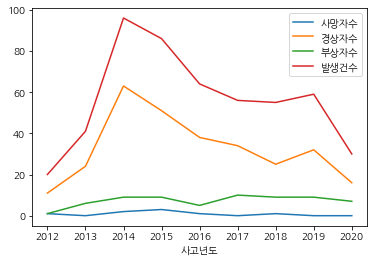

In [113]:
bike1.groupby('사고년도')['사망자수'].sum().plot(label='사망자수')
bike1.groupby('사고년도')['경상자수'].sum().plot(label='경상자수')
bike1.groupby('사고년도')['부상자수'].sum().plot(label='부상자수')
bike1.groupby('사고년도')['발생건수'].sum().plot(label='발생건수')
plt.legend()
plt.show()

In [114]:
#suwon데이터
map= folium.Map(location=[bike1['위도'].mean(),bike1['경도'].mean()],
           zoom_start=10)

for  n in bike1.index:
    name=bike1.loc[n,'시도시군구명']
    address=bike1.loc[n,'위치코드']
    popup = f"{name}-{address}"
    location= [bike1.loc[n,'위도'],bike1.loc[n,'경도']]
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map)
map# # #위도의 평균과 경도의 평균을 구하고, 지도의 중심을 잡아준다.

### 수원시 무단횡단사고다발지

In [115]:
walk=suwon[suwon['사고유형구분']=='무단횡단사고다발지']
walk.head()

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
872,수원시,2017,무단횡단사고다발지,133941001,경기 수원서부1,경기도 수원시 권선구 구운동(구운오거리 부근),5,5,1,2,1,1,37.281630,126.973689
873,수원시,2017,무단횡단사고다발지,133041004,경기 수원남부4,경기도 수원시 영통구 매탄동(매탄삼거리 부근),5,5,0,4,1,0,37.270451,127.042884
874,수원시,2017,무단횡단사고다발지,133041002,경기 수원남부2,경기도 수원시 팔달구 인계동(시청사거리 부근),6,6,1,3,2,0,37.264216,127.025944
875,수원시,2017,무단횡단사고다발지,133041003,경기 수원남부3,경기도 수원시 팔달구 인계동(지동사거리 부근),6,6,0,2,4,0,37.275597,127.021782
876,수원시,2017,무단횡단사고다발지,133041001,경기 수원남부1,경기도 수원시 권선구 권선동(세권사거리 부근),7,8,1,3,3,1,37.256406,127.021926


In [116]:
walk.shape

(67, 14)

In [117]:
walk['발생건수'].sum()

417

In [118]:
walk['사망자수'].sum()

25

In [119]:
walk['중상자수'].sum()

267

In [120]:
walk['부상자수'].sum()

9

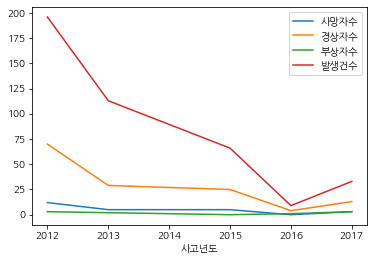

In [121]:
walk.groupby('사고년도')['사망자수'].sum().plot(label='사망자수')
walk.groupby('사고년도')['경상자수'].sum().plot(label='경상자수')
walk.groupby('사고년도')['부상자수'].sum().plot(label='부상자수')
walk.groupby('사고년도')['발생건수'].sum().plot(label='발생건수')
plt.legend()
plt.show()

<AxesSubplot:xlabel='사고년도'>

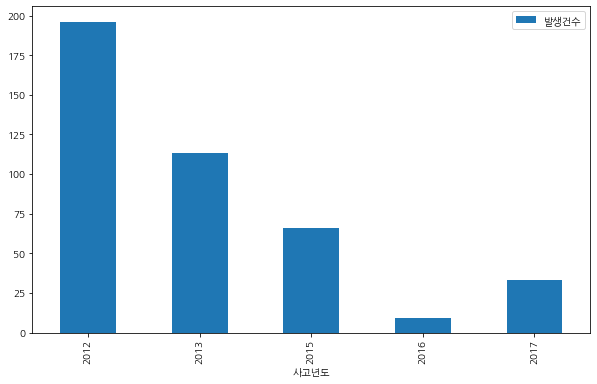

In [122]:
(
walk
.groupby('사고년도')
.agg({'발생건수':'sum'})
) .plot(kind='bar',figsize=(10,6))

<AxesSubplot:xlabel='사고년도'>

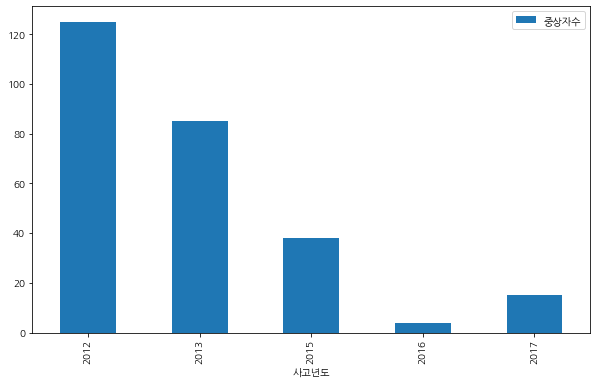

In [123]:
(
walk
.groupby('사고년도')
.agg({'중상자수':'sum'})
) .plot(kind='bar',figsize=(10,6))

In [124]:
walk.sort_values('발생건수',ascending=False).head(3) #태평역 근처에 사거리로 유동인구와 차가 많은것으로 예상
                                                     # 삼거리나 사거리가 많은 지역임

,시군명,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도
1073,수원시,2012,무단횡단사고다발지,411339009,경기 수원서부9,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26,26,0,22,4,0,37.265498,127.001433
1018,수원시,2013,무단횡단사고다발지,411339001,경기 수원서부1,경기도 수원시 팔달구 교동(수원역남단교차로 부근),23,23,0,18,5,0,37.266356,127.001493
939,수원시,2015,무단횡단사고다발지,41115001,경기도 수원시 팔달구1,경기도 수원시 팔달구 매산로1가(수원역동측단일로 부근),20,20,2,12,6,0,37.266833,127.001830


In [125]:
#사고유형을 기준으로 정렬해보기
(
    walk[['사고년도','발생건수']]
.sort_values('발생건수',ascending=False)
)

,사고년도,발생건수
1073,2012,26
1018,2013,23
939,2015,20
1072,2012,13
1053,2012,13
...,...,...
1044,2012,4
1043,2012,4
1042,2012,4
1052,2012,3


In [187]:
pv6=walk.pivot_table(index='시도시군구명',columns='사고년도',values='발생건수',
              aggfunc='sum',fill_value=0)
pv6

사고년도,2012,2013,2015,2016,2017
시도시군구명,,,,,
경기 수원남부1,4,9,0,0,7
경기 수원남부2,4,5,0,0,6
경기 수원남부3,4,4,0,0,6
경기 수원남부4,7,4,0,0,5
경기 수원남부5,7,0,0,0,4
경기 수원서부1,4,23,0,4,5
경기 수원서부2,4,8,0,0,0
경기 수원서부3,4,7,0,0,0
경기 수원서부4,4,4,0,0,0


<AxesSubplot:xlabel='시도시군구명'>

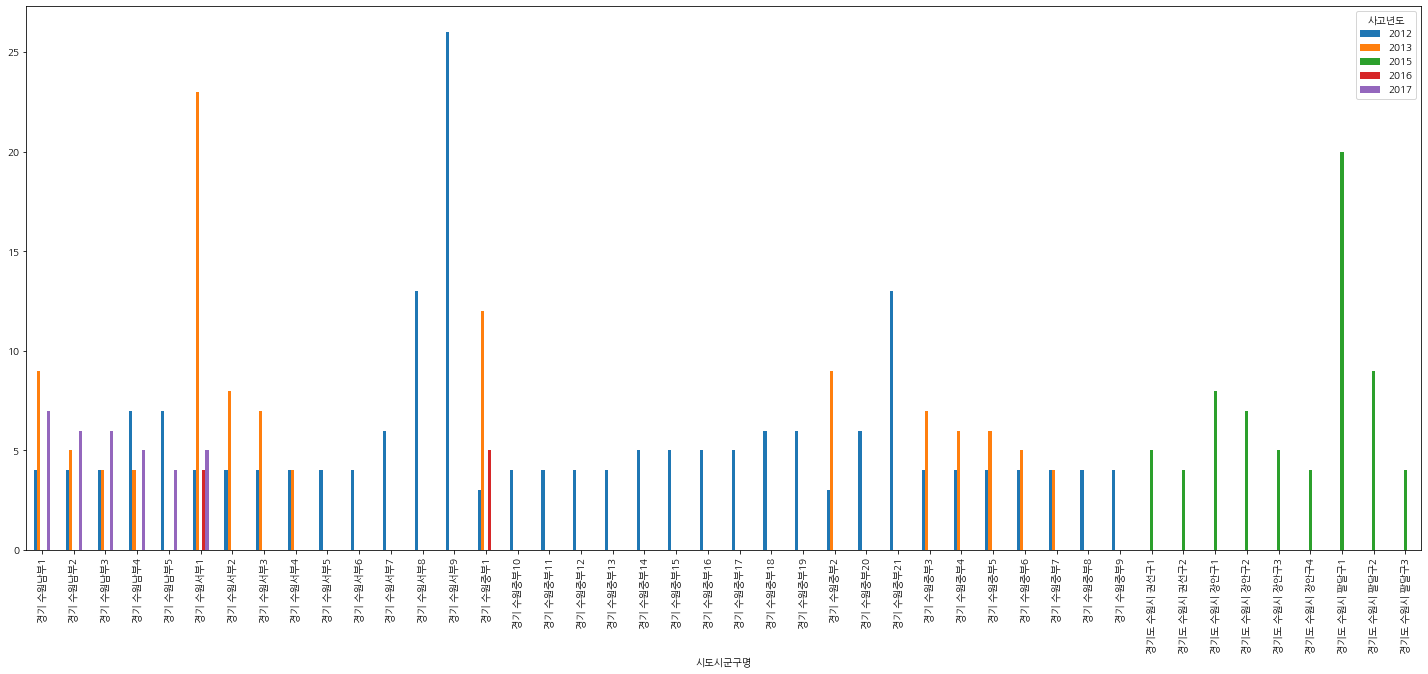

In [188]:
pv6.plot(kind='bar',figsize=(25,10))

In [126]:
map= folium.Map(location=[walk['위도'].mean(),walk['경도'].mean()],
           zoom_start=10)

for  n in walk.index:
    name=df.loc[n,'시도시군구명']
    address=walk.loc[n,'위치코드']
    popup = f"{name}-{address}"
    location= [walk.loc[n,'위도'],walk.loc[n,'경도']]
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map)
map# # #위도의 평균과 경도의 평균을 구하고, 지도의 중심을 잡아준다.

###  기사를 찾아본 결과:  16년도부터 전체적으로 사고발생률이 급격히 적어지는 이유는 도로교통법 개선 및 제한 속도 규정으로  사고가 줄어드는것으로 보인다.
###   https://www.korea.kr/briefing/pressReleaseView.do?newsId=156185953